### Preprocessing

In [1]:
# import relevant statistical packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [2]:
# import data visualisation packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [3]:
# import Carseats data
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Carseats.csv"
df = pd.read_csv(url).drop('Unnamed: 0', axis=1)
df.Sales = df.Sales.map(lambda x: 0 if x<=8 else 1)
df.ShelveLoc = pd.factorize(df.ShelveLoc)[0]
df.Urban = df.Urban.map({'No':0, 'Yes':1})
df.US = df.US.map({'No':0, 'Yes':1})

In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


### 8.a. Splitting the data set into training and test data set

In [9]:
X = df.drop(['Sales'], axis = 1)
y = df.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, test_size = 0.3, random_state = 0)

### 8.b. Regression tree

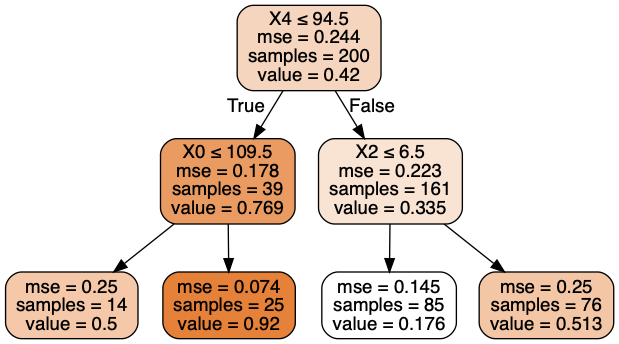

In [20]:
tree_cs = DecisionTreeRegressor(max_depth = 2).fit(X_train, y_train)

dot_data = StringIO()

export_graphviz(tree_cs, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=250000)

Mean Squared Error:  0.2158895985296514


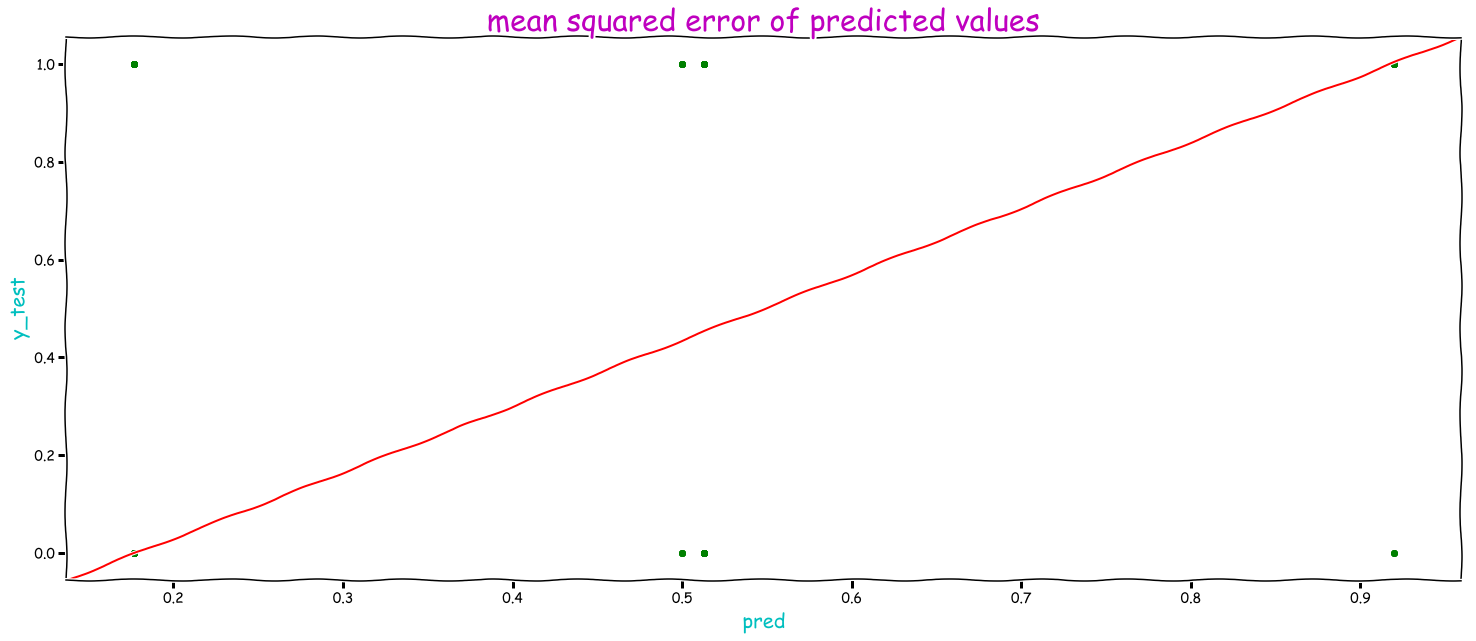

In [21]:
pred = tree_cs.predict(X_test)

plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(pred, y_test, label = 'medv', color='g')
plt.plot([0, 1], [0, 1], 'r', transform = plt.gca().transAxes)

plt.xlabel('pred', color='c', fontsize=20)
plt.ylabel('y_test', color='c', fontsize=20)
plt.title('mean squared error of predicted values', fontsize=30, color='m')

print("Mean Squared Error: ", mean_squared_error(y_test, pred))

**Therefore, the test MSE$\approx$0.22**

### 8.c. Pruning the regression tree

In [22]:
SCORES = []
max_leafs_arr = range(2, 50)
for max_leafs in max_leafs_arr:
    regressionTree = DecisionTreeRegressor(max_leaf_nodes=max_leafs)
    sc = cross_val_score(regressionTree, X, y, cv=10, scoring="neg_mean_squared_error")
    SCORES.append((-sc.mean(), sc.std()))
SCORES = np.array(SCORES)

The best tree has 15 leafs.


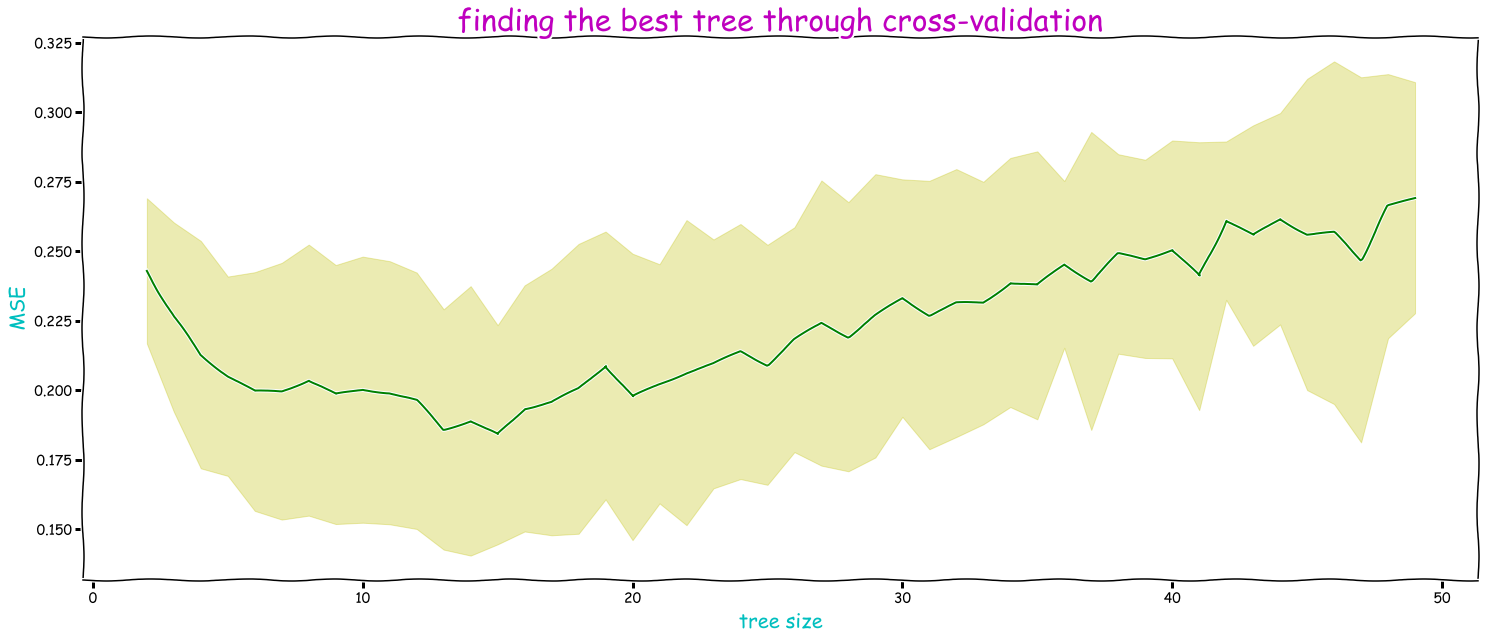

In [23]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(max_leafs_arr, SCORES[:,0], 'g')
plt.fill_between(max_leafs_arr, SCORES[:,0]+SCORES[:,1], SCORES[:,0]-SCORES[:,1], alpha=0.3, color='y')
plt.xlabel('tree size', fontsize=20, color='c')
plt.ylabel('MSE', fontsize=20, color='c')
plt.title('finding the best tree through cross-validation', fontsize=30, color='m')
best_min_leafs = max_leafs_arr[np.argmin(SCORES[:,0])]
print(f"The best tree has {best_min_leafs} leafs.")

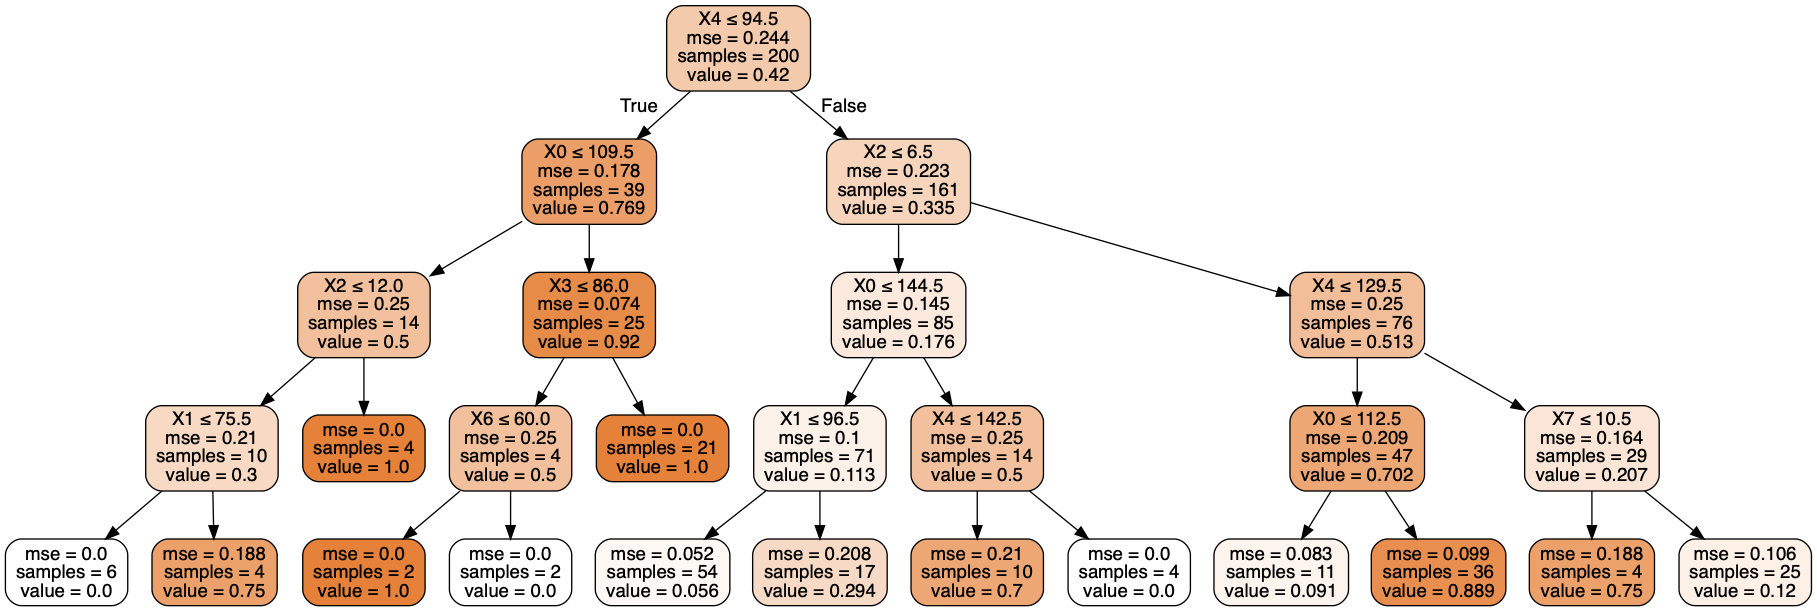

In [24]:
tree_cs = DecisionTreeRegressor(max_depth = 4).fit(X_train, y_train)

dot_data = StringIO()

export_graphviz(tree_cs, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=250000)

Mean Squared Error:  0.27716361927089567


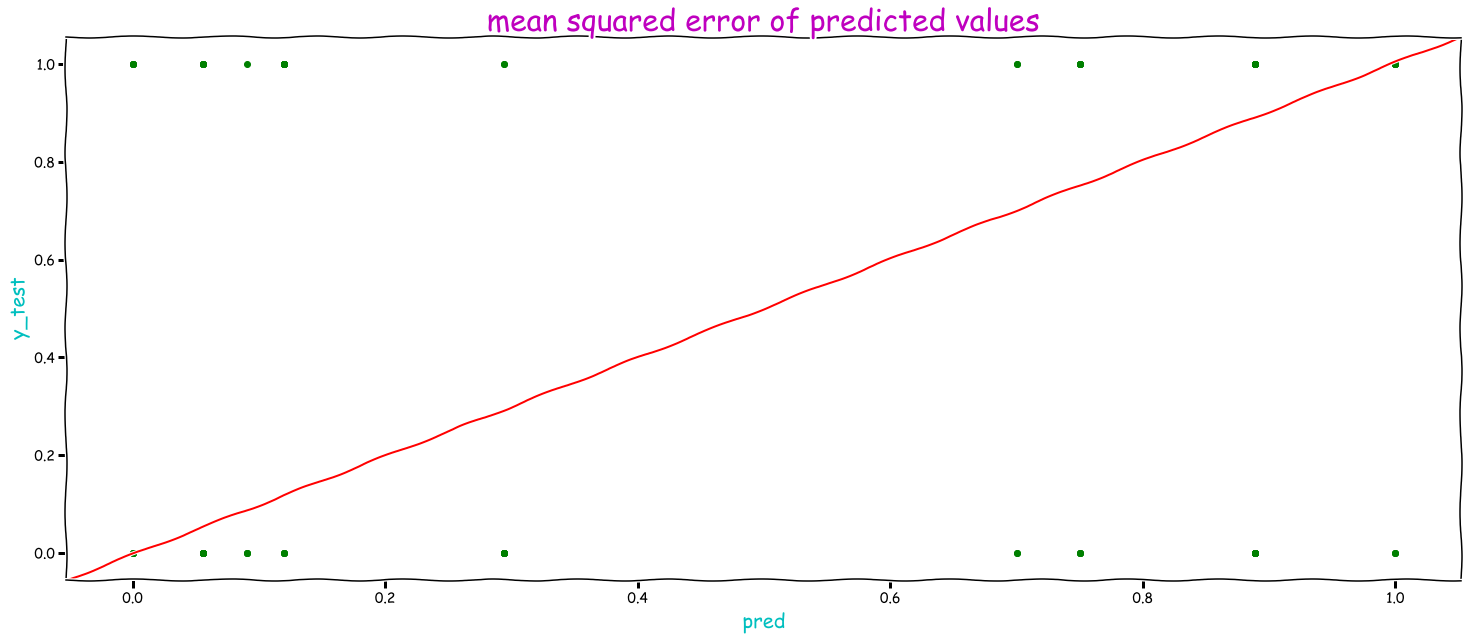

In [25]:
pred = tree_cs.predict(X_test)

plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(pred, y_test, label = 'medv', color='g')
plt.plot([0, 1], [0, 1], 'r', transform = plt.gca().transAxes)

plt.xlabel('pred', color='c', fontsize=20)
plt.ylabel('y_test', color='c', fontsize=20)
plt.title('mean squared error of predicted values', fontsize=30, color='m')

print("Mean Squared Error: ", mean_squared_error(y_test, pred))

**Pruning in this instance actually *increases* the test MSE.**

### 8.d. Bagging

Mean Squared Error:  0.22033333333333333


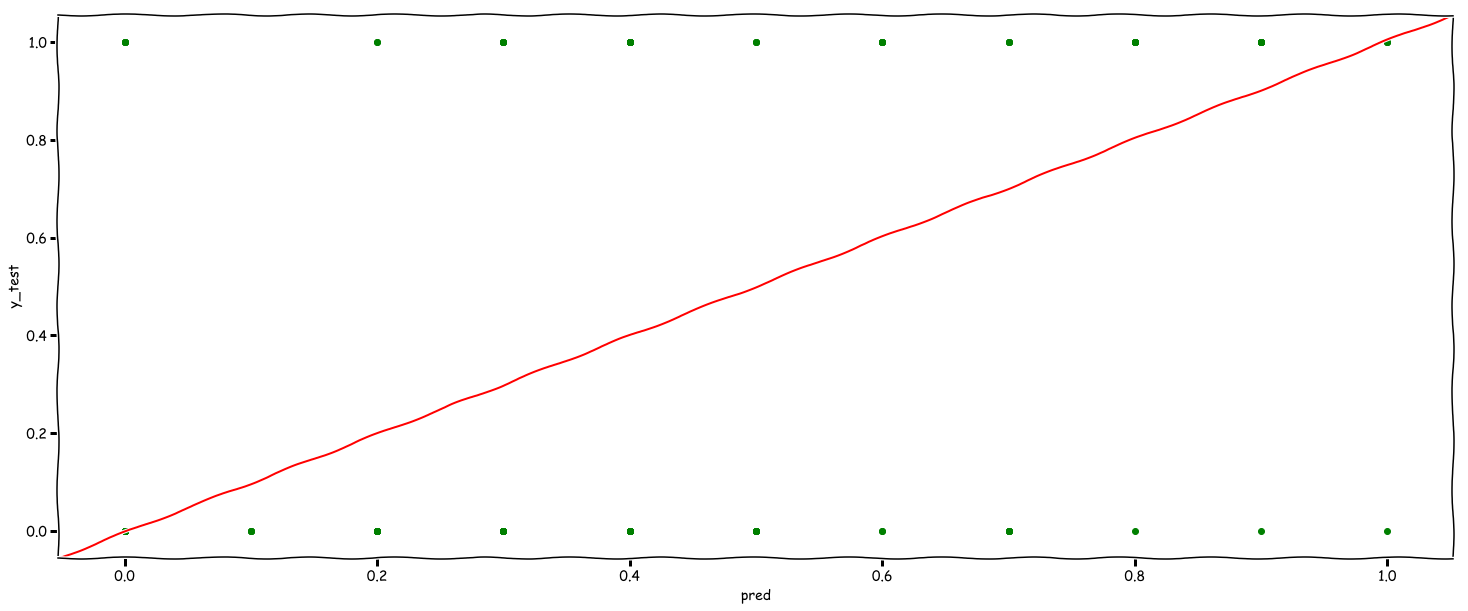

In [39]:
import warnings
warnings.filterwarnings('ignore')

bag_cs = RandomForestRegressor(max_features=10).fit(X_train, y_train)
bag_pred = bag_cs.predict(X_test)

plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(bag_pred, y_test, label = 'medv', color='g')
plt.plot([0, 1], [0, 1], 'r', transform = plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

print("Mean Squared Error: ", mean_squared_error(y_test, bag_pred))

**Bagging provides significant reduction in mean squared error over regression models.**

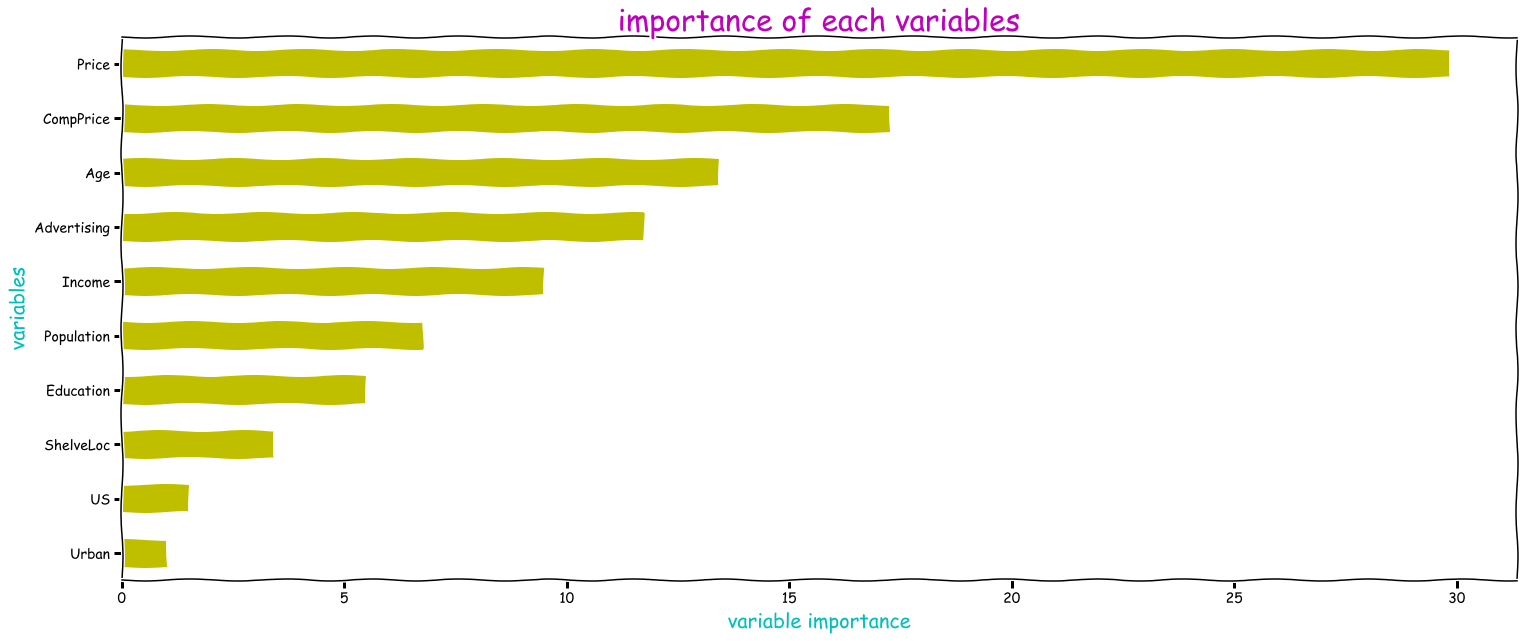

In [40]:
Importance = pd.DataFrame({'Importance': bag_cs.feature_importances_*100}, index = X.columns)
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'y')

plt.xkcd()
plt.xlabel('variable importance', fontsize=20, color='c')
plt.ylabel('variables', fontsize=20, color='c')
plt.title('importance of each variables', fontsize=30, color='m')
plt.gca().legend_ = None
fig = plt.gcf()
fig.set_size_inches(25, 10)

### 9.e. Random forest

**$m$=4**

Mean Squared Error:  0.19216666666666665


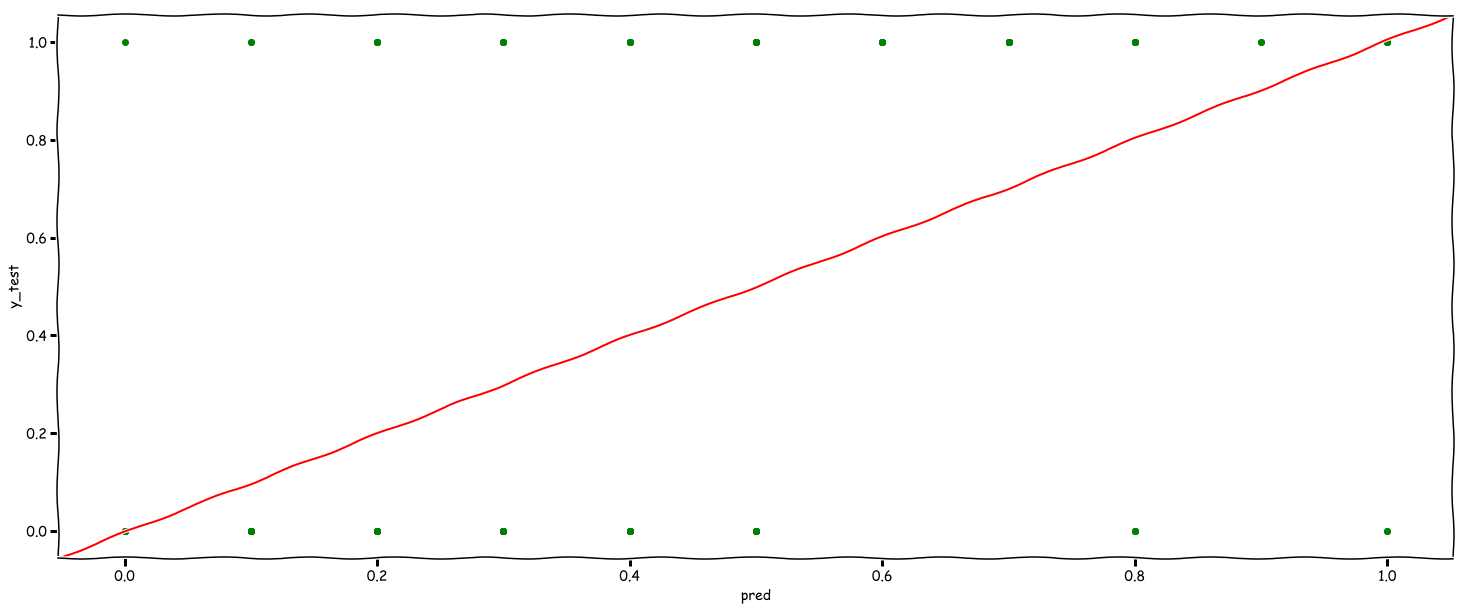

In [56]:
rf_cs = RandomForestRegressor(max_features=3).fit(X_train, y_train)

rf_pred = rf_cs.predict(X_test)

plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(rf_pred, y_test, label = 'medv', color='g')
plt.plot([0, 1], [0, 1], 'r', transform = plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

print("Mean Squared Error: ", mean_squared_error(y_test, rf_pred))

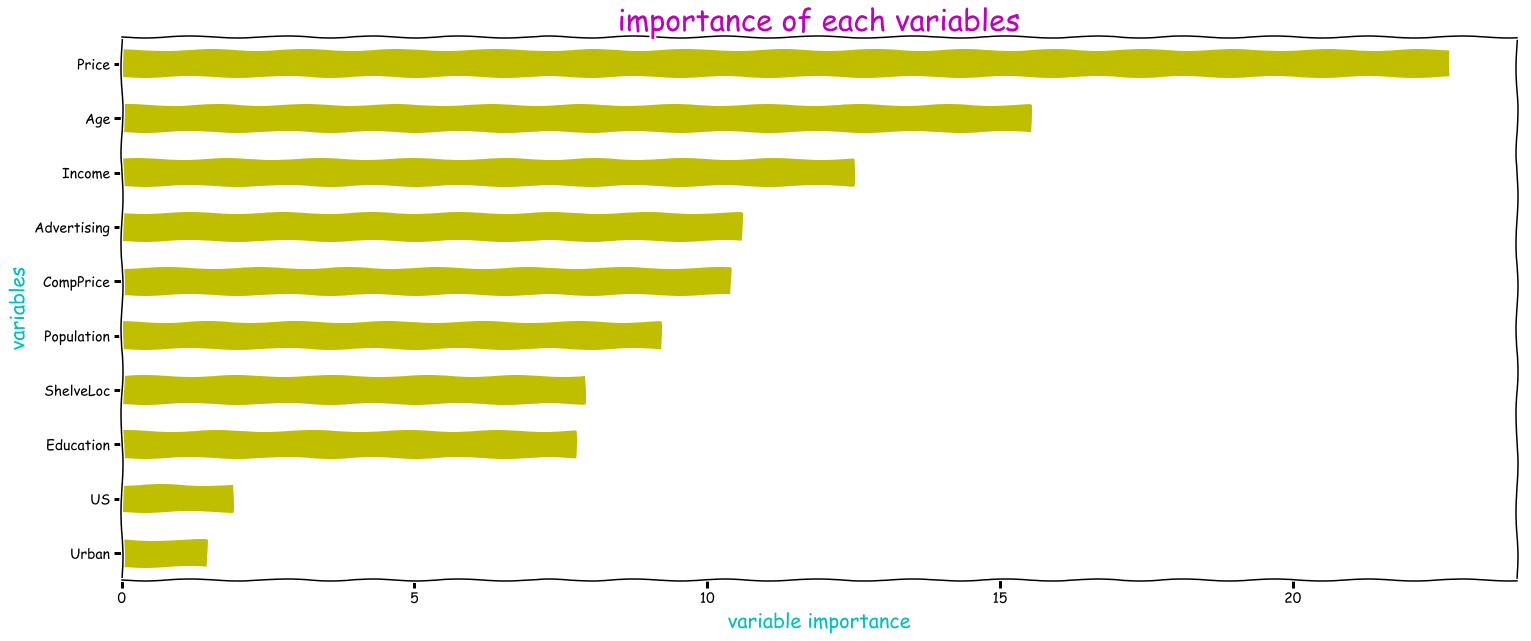

In [57]:
Importance = pd.DataFrame({'Importance': rf_cs.feature_importances_*100}, index = X.columns)
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'y')

plt.xkcd()
plt.xlabel('variable importance', fontsize=20, color='c')
plt.ylabel('variables', fontsize=20, color='c')
plt.title('importance of each variables', fontsize=30, color='m')
plt.gca().legend_ = None
fig = plt.gcf()
fig.set_size_inches(25, 10)

**Random forest decreases the test MSE.**

Text(0.5,1,'effect of number of variables on MSE')

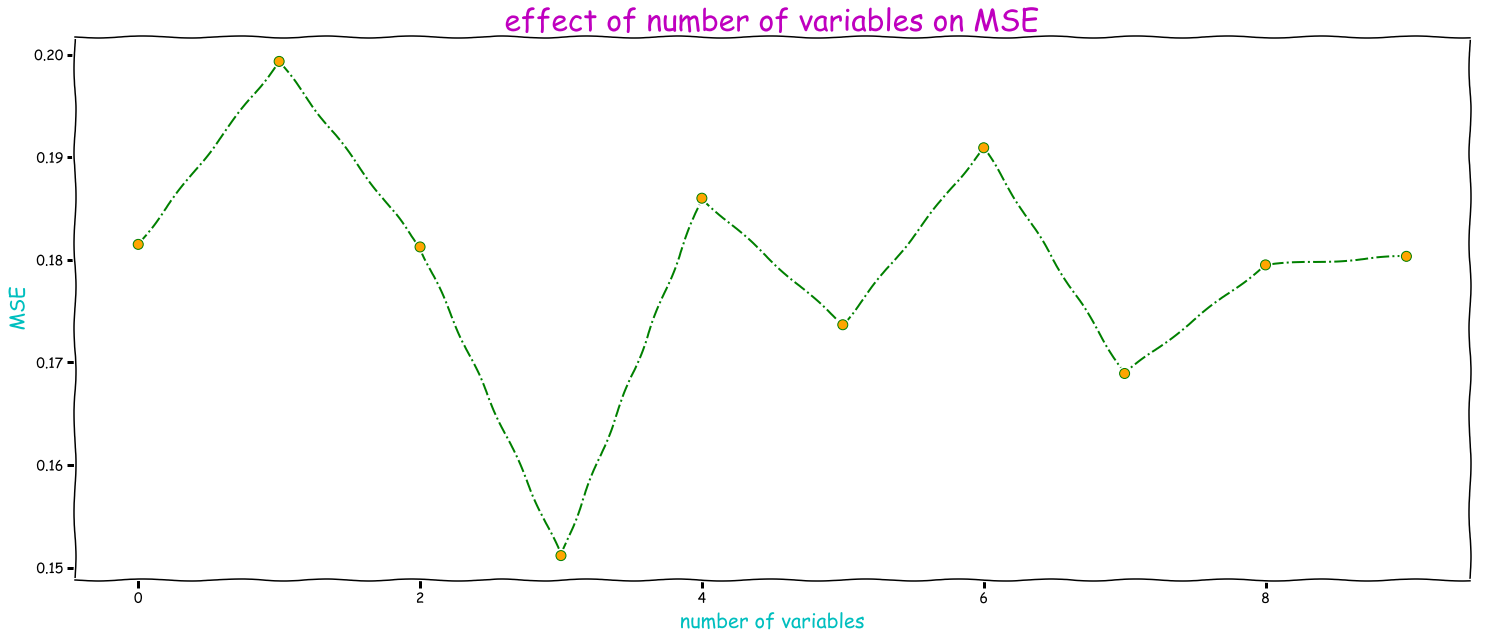

In [55]:
MSE = pd.DataFrame()

for k in range(1,11):
    rf_cs = RandomForestRegressor(max_features=k).fit(X_train, y_train)
    rf_pred = rf_cs.predict(X_test)
    mse = mean_squared_error(y_test, rf_pred)
    MSE = MSE.append([mse])
    
MSE.reset_index(drop=True, inplace=True)
plt.figure(figsize=(25, 10))
plt.plot(MSE, color='g', ls='-.', marker='o', markersize=10, markerfacecolor='orange')
plt.xlabel('number of variables', color='c', fontsize=20)
plt.ylabel('MSE', color='c', fontsize=20)
plt.title('effect of number of variables on MSE', color='m', fontsize=30)

**Changing m varies test MSE between approx. 0.15 to approx. 0.20.**